In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns


# from sklearn import metrics
from sklearn.feature_selection import mutual_info_regression
# from sklearn.feature_selection import mutual_info_regression
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# from sklearn.model_selection import train_test_split, GridSearchCV


# # Build the Regression / Regressor models
# # from xgboost import XGBRegressor
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier


# import os
# import datetime
# from datetime import datetime as datet
# from decimal import Decimal
import warnings
# from pickle import dump, load

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
mp.style.use('fivethirtyeight')
pd.options.display.float_format = '{:.5}'.format

In [2]:
data = pd.read_csv("data.csv")
data.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                            0.37059          
1          1                                            0.46429          
2          1                                            0.42607          
3          1                                            0.39984          
4          1                                            0.46502          

    ROA(A) before interest and % after tax  \
0                                  0.42439   
1                                  0.53821   
2                                  0.49902   
3                                  0.45126   
4                                  0.53843   

    ROA(B) before interest and depreciation after tax  \
0                                            0.40575    
1                                            0.51673    
2                                             0.4723    
3                                            0.45773    
4                                             0.5223    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                  0.60146                       0.60146   
1                  0.61024                       0.61024   
2                  0.60145                       0.60136   
3                  0.58354                       0.58354   
4                  0.59878                       0.59878   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                 0.99897                     0.79689   
1                 0.99895                     0.79738   
2                 0.99886                      0.7964   
3                  0.9987                     0.79697   
4                 0.99897                     0.79737   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                       0.80881                                       0.30265   
1                        0.8093                                       0.30356   
2                       0.80839                                       0.30204   
3                       0.80897                                       0.30335   
4                        0.8093                                       0.30347   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                                0.78098                0.0001257   
1                                0.78151               0.00028979   
2                                0.78028               0.00023613   
3                                0.78124               0.00010789   
4                                0.78155                 7.89e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0          0.45814   
1                                     0.0          0.46187   
2                                2.55e+07          0.45852   
3                                     0.0          0.46571   
4                                     0.0          0.46275   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                            0.00072507            0.0   
1                            0.00064706            0.0   
2                            0.00079008            0.0   
3                            0.00044904            0.0   
4                            0.00068607            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                   0.14795                   0.14795   
1                   0.18225                   0.18225   
2                   0.17791                   0.17791   
3                   0.15419                   0.15419   
4                    0.1675                    0.1675   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                   0.14795                                   0.16914   
1                   0.18225                                   0.20894   
2                   0.19371                     

In [34]:
X_train, X_test, Y_train, Y_test = pd.read_csv("X_train.csv"), pd.read_csv("X_test.csv"), pd.read_csv("Y_train.csv"), pd.read_csv("Y_test.csv")

Y_train = Y_train.drop(["Unnamed: 0"], axis=1)
X_train = X_train.drop(["Unnamed: 0"], axis=1)

Y_test = Y_test.drop(["Unnamed: 0"], axis=1)
X_test = X_test.drop(["Unnamed: 0"], axis=1)

In [35]:
X_train.columns

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate'

In [36]:
X_train.shape

(4568, 95)

In [5]:
for col in data.columns:
    if "Invoice"in col or "invoice" in col:
        print(col)
print("Done")

Done


In [6]:
data.shape

(6819, 96)

In [7]:
data["Bankrupt?"].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

TODO:-
* Make a plan and what all things to do. Analyse the data and write al group bys, crosstabs, visualizations algos to use etc. Just go raw on the dataset
    * Make sure to add multitudes of things as this is not a competition submission but knowledge display.
    * Data Quality and Description all in one Function - **Day 1**
        * Shape
        * Missing Rows
        * Unique Values (Only cat ftrs, if numeric and <= 20 unique vals) and their counts
        * Creating a list of cat ftrs and numeric ftrs with vals <= 20 and other numeric ftrs.
        * Duplicate Records
        * If numeric col print skew and kurtosis
    * Pre Feature Selection - Correlation, Mutual Information. **Day 1**
    * Feature Selection - Predictive Power Score, Random Forests. **Day 1**
    * Hypothesis Testing - 2 sample T-test on the remaining columns. **Day 2**
    * Group bys - On the remaining columns. **Day 3**
    * Visualizations - Box Plots, KDE Plots (to understand distributions), the line thingy. **Day 3**
    * Crosstabs and that color thing **Day 3**
    * Outlier Detection with - Box plots, LOF, Gaussian Distribution Thingy, ECOD. **Day 4**
    * UMAP and PCA comparison - How to integrate in the notebook. **Day 4, 5**
    * BorderLine SMOTE **Day 5**
    * Model Training- multiple models  **Day 6**
    * Accuracy Metrics **Day 6**
    * Probability Threshold Analysis  **Day 7**
    * LIME - Model Interpretability.  **Day 7**
    * Conclusion and other important points and submission-running **Day 8**
* Make a time sheet (JIRA Kinda thing) - Deadline - 7th Sept
* Execute
* We get Gold for this one.

* Group by 
    * analyze ranges and outliers
    * avg and median values
    * 
* UMAP and TSNE
* SMOTE

In [13]:
data["Bankrupt?"].dtypes == 'int64'

True

In [17]:
def data_quality(data, target_var, unique_val_threshold = 20, num_to_cat_threshold = 20):
    cat_cols = []
    num_cols = []
    cat_cols_num_val = []
    date_time_cols = []
    data_info = pd.DataFrame(columns=['Column Name', 'Num Unique Values', 'DType', "Null Values", "Skew", "Kurtosis"])
    ctr = 1

    print("Shape:- ", data.shape[0], " rows & ", data.shape[1], " cols")
    print("\n--------------------------------------------------------\n")
    # print(data.isna().sum())
    # print("\n--------------------------------------------------------\n")
    
    for col in data.columns:
        # print(col, " - ", data[col].nunique(), " - ", data[col].dtypes, "\n")
        data_info.loc[ctr] = [col, data[col].nunique(), data[col].dtypes, data[col].isna().sum(), data[col].skew(), data[col].kurtosis()]
        ctr += 1

        if data[col].nunique() <= unique_val_threshold:
            print(col)
            print(data[col].unique())
            print("----------------------------------------------------------------------------")
            print()
        
        if data[col].dtypes == object:
            cat_cols.append(col)
        elif data[col].dtypes == "int64" or data[col].dtypes == "float64":
            if data[col].nunique() <= num_to_cat_threshold:
                cat_cols_num_val.append(col)
            else:
                num_cols.append(col)
        elif data[col].dtypes == "datetime64":
            date_time_cols.append(col)

    dups = data.drop([target_var], axis = 1).duplicated().sum()
    print("Total number of Duplicates:- ", dups)
    print("\n--------------------------------------------------------\n")
    
    print("Categorical Columns:-\n", cat_cols, "\n")
    print("Numerical Columns:- \n", num_cols, "\n")
    print("Categorical Coumns Having Numerical Values:- \n", cat_cols_num_val, "\n")
    print("Date Time Columns:-\n", date_time_cols, "\n")
    print("\n--------------------------------------------------------\n")
    # data_info = pd.concat([data_info, data.isna().sum()])
    return data_info, cat_cols, num_cols, cat_cols_num_val, date_time_cols

In [18]:
data_info, cat_cols, num_cols, cat_col_num_val, date_time_cols = data_quality(data, "Bankrupt?")

Shape:-  6819  rows &  96  cols

--------------------------------------------------------

Bankrupt?
[1 0]
----------------------------------------------------------------------------

 Liability-Assets Flag
[0 1]
----------------------------------------------------------------------------

 Net Income Flag
[1]
----------------------------------------------------------------------------

Total number of Duplicates:-  0

--------------------------------------------------------

Categorical Columns:-
 [] 

Numerical Columns:- 
 [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cas

In [19]:
data_info

Column Name  Num Unique Values  \
1                                           Bankrupt?                  2   
2    ROA(C) before interest and depreciation befor...               3333   
3              ROA(A) before interest and % after tax               3151   
4    ROA(B) before interest and depreciation after...               3160   
5                              Operating Gross Margin               3781   
6                         Realized Sales Gross Margin               3788   
7                               Operating Profit Rate               3376   
8                           Pre-tax net Interest Rate               3789   
9                         After-tax net Interest Rate               3604   
10        Non-industry income and expenditure/revenue               2551   
11               Continuous interest rate (after tax)               3617   
12                             Operating Expense Rate               2966   
13              Research and development expense rate               1536   
14                                     Cash flow rate               5557   
15                Interest-bearing debt interest rate               1080   
16                                       Tax rate (A)               2488   
17                            Net Value Per Share (B)               2278   
18                            Net Value Per Share (A)               2285   
19                            Net Value Per Share (C)               2284   
20            Persistent EPS in the Last Four Seasons               1358   
21                                Cash Flow Per Share               1545   
22                         Revenue Per Share (Yuan ¥)               3807   
23                Operating Profit Per Share (Yuan ¥)               1236   
24           Per Share Net profit before tax (Yuan ¥)               1522   
25            Realized Sales Gross Profit Growth Rate               5583   
26                       Operating Profit Growth Rate               6249   
27                   After-tax Net Profit Growth Rate               6246   
28                     Regular Net Profit Growth Rate               6253   
29                  Continuous Net Profit Growth Rate               6270   
30                            Total Asset Growth Rate               1751   
31                              Net Value Growth Rate               4502   
32               Total Asset Return Growth Rate Ratio               2903   
33                                Cash Reinvestment %               3599   
34                                      Current Ratio               6132   
35                                        Quick Ratio               6094   
36                             Interest Expense Ratio               3794   
37                         Total debt/Total net worth               5518   
38                                       Debt ratio %               4208   
39                                   Net worth/Assets               4208   
40               Long-term fund suitability ratio (A)               6523   
41                               Borrowing dependency               4338   
42                   Contingent liabilities/Net worth               1855   
43                   Operating profit/Paid-in capital               4423   
44              Net profit before tax/Paid-in capital               4785   
45        Inventory and accounts receivable/Net value               5289   
46                               Total Asset Turnover                381   
47                       Accounts Receivable Turnover               1593   
48                            Average Collection Days               5451   
49                    Inventory Turnover Rate (times)               2397   
50                    Fixed Assets Turnover Frequency               2451   
51                    Net Worth Turnover Rate (times)                741   
52                                 Revenue per person               5667   
53            

In [23]:
data_info.loc[8]["Column Name"]

' Pre-tax net Interest Rate'

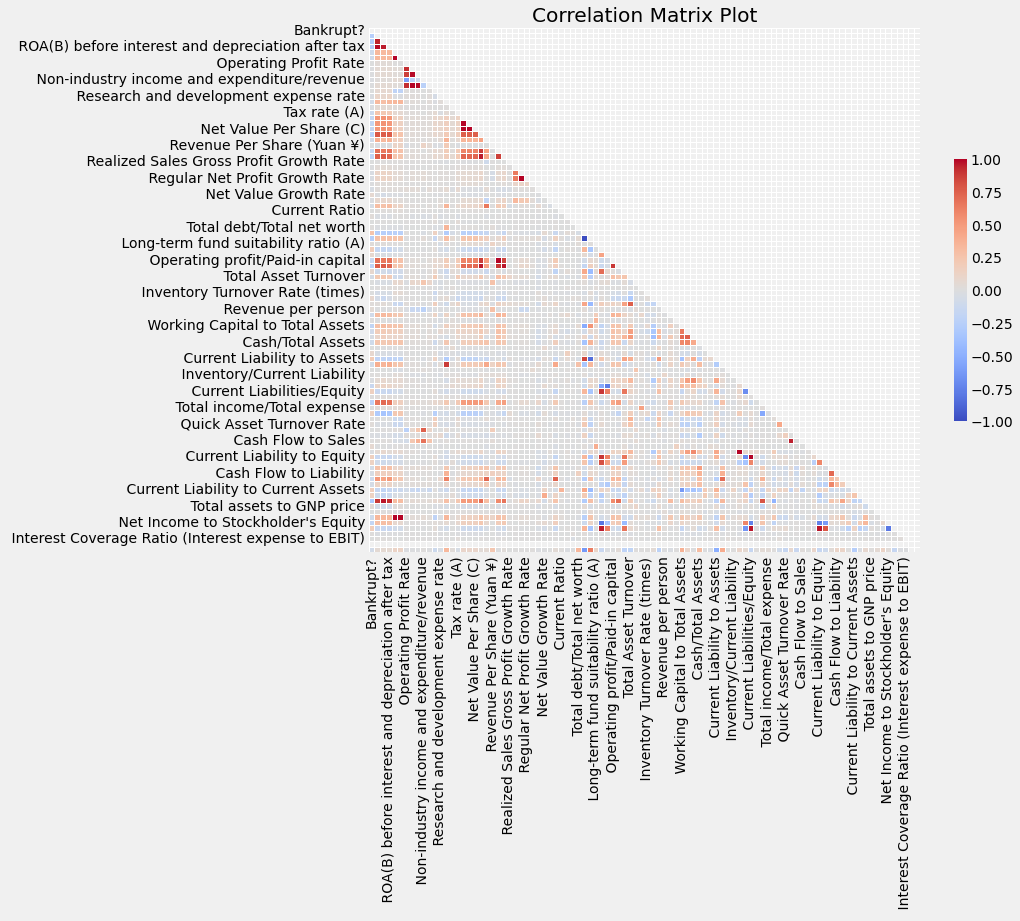

In [37]:
data_corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(data_corr, dtype=bool))
fig, ax = mp.subplots(figsize=(11, 9))
palette = sns.color_palette("coolwarm", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data_corr, mask=mask, cmap=palette, center=0, linewidths=0.7, cbar_kws={"shrink": .5})

mp.title("Correlation Matrix Plot")
mp.show()

[Mutual Information v/s Information Gain](https://www.geeksforgeeks.org/information-gain-and-mutual-information-for-machine-learning/)

[MI - Feature Selection](https://bobrupakroy.medium.com/mutual-information-score-feature-selection-8eb19071664b#:~:text=Mutual%20information%20is%20straightforward%20when,condition%20of%20the%20target%20value.&text=The%20MI%20score%20will%20fall,the%20feature%20and%20the%20target.)

[MI between continous and discreet variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3929353/)

In [16]:
from sklearn.model_selection import train_test_split
X, Y = data.drop(["Bankrupt?"], axis = 1), data["Bankrupt?"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [17]:
def mi(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [15]:
mi_cols = mi(data.drop(["Bankrupt?"], axis = 1), data["Bankrupt?"])

mi_selected_cols = mi_cols.loc[mi_cols >= 0.03].index.tolist()
mi_selected_cols

[' Persistent EPS in the Last Four Seasons',
 ' Net profit before tax/Paid-in capital',
 " Net Income to Stockholder's Equity",
 ' Net Income to Total Assets',
 ' ROA(A) before interest and % after tax',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Continuous interest rate (after tax)',
 ' Net worth/Assets',
 ' Equity to Liability',
 ' Borrowing dependency',
 ' Debt ratio %',
 ' Degree of Financial Leverage (DFL)',
 ' Retained Earnings to Total Assets',
 ' Interest Expense Ratio',
 ' ROA(B) before interest and depreciation after tax',
 ' Net Value Per Share (B)',
 ' Liability to Equity',
 ' ROA(C) before interest and depreciation before interest',
 ' Total income/Total expense',
 ' Interest Coverage Ratio (Interest expense to EBIT)']

In [18]:
mi_cols = mi(X_train, Y_train)

mi_selected_cols = mi_cols.loc[mi_cols >= 0.03].index.tolist()
mi_selected_cols

[" Net Income to Stockholder's Equity",
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Persistent EPS in the Last Four Seasons',
 ' ROA(A) before interest and % after tax',
 ' Borrowing dependency',
 ' Net Income to Total Assets',
 ' Net Value Per Share (C)',
 ' Net profit before tax/Paid-in capital',
 ' Interest Expense Ratio',
 ' ROA(C) before interest and depreciation before interest',
 ' Equity to Liability',
 ' Debt ratio %',
 ' Net worth/Assets',
 ' Net Value Per Share (B)']

In [35]:
mi_cols

 Net Income to Stockholder's Equity                          0.037908
 Per Share Net profit before tax (Yuan ¥)                    0.035074
 Persistent EPS in the Last Four Seasons                     0.034669
 ROA(A) before interest and % after tax                      0.034309
 Borrowing dependency                                        0.033912
 Net Income to Total Assets                                  0.033452
 Net Value Per Share (C)                                     0.032915
 Net profit before tax/Paid-in capital                       0.032727
 Interest Expense Ratio                                      0.032154
 ROA(C) before interest and depreciation before interest     0.031971
 Equity to Liability                                         0.031093
 Debt ratio %                                                0.030774
 Net worth/Assets                                            0.030239
 Net Value Per Share (B)                                     0.030074
 Interest Coverage R

In [23]:
mi_selected_cols_without_split = set([' Persistent EPS in the Last Four Seasons',
 ' Net profit before tax/Paid-in capital',
 " Net Income to Stockholder's Equity",
 ' Net Income to Total Assets',
 ' ROA(A) before interest and % after tax',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Continuous interest rate (after tax)',
 ' Net worth/Assets',
 ' Equity to Liability',
 ' Borrowing dependency',
 ' Debt ratio %',
 ' Degree of Financial Leverage (DFL)',
 ' Retained Earnings to Total Assets',
 ' Interest Expense Ratio',
 ' ROA(B) before interest and depreciation after tax',
 ' Net Value Per Share (B)',
 ' Liability to Equity',
 ' ROA(C) before interest and depreciation before interest',
 ' Total income/Total expense',
 ' Interest Coverage Ratio (Interest expense to EBIT)'])


mi_selected_cols = set(mi_selected_cols)

print(mi_selected_cols.issubset(mi_selected_cols_without_split))
print()

print(mi_selected_cols - mi_selected_cols_without_split)
print()

print(mi_selected_cols_without_split - mi_selected_cols)
print()

False

{' Net Value Per Share (C)'}

{' Interest Coverage Ratio (Interest expense to EBIT)', ' ROA(B) before interest and depreciation after tax', ' Liability to Equity', ' Retained Earnings to Total Assets', ' Degree of Financial Leverage (DFL)', ' Total income/Total expense', ' Continuous interest rate (after tax)'}



In [19]:
len(mi_selected_cols)

14

In [ ]:
# Calculating Predictive power score (PPS)
pps_input_df = X_train.copy()
pps_input_df['Bankrupt'] = y_train.astype(str).copy()
pps_df = pps.predictors(pps_input_df, y="Bankrupt")
pps_df = pps_df[pps_df.ppscore > 0]

# Plotting PPS
plt.figure(figsize=(16,6))
sns.barplot(data=pps_df, x="ppscore", y="x")
plt.ylabel("Features")
plt.xlabel("PPScore > 0")
plt.tight_layout()
plt.title("PPScore")
plt.show()

In [18]:
print(pd.__version__)

2.2.2


In [5]:
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, DropDuplicateFeatures
from sklearn.pipeline import Pipeline

In [32]:
# X, y = data.drop(["Bankrupt?"], axis=1), data["Bankrupt?"]
# X.drop(X.columns[X.nunique() == 1][0], axis = 1, inplace = True)

pipeline = Pipeline(steps=[
    ('Constant', DropConstantFeatures()),
    ('Correlated', DropCorrelatedFeatures())
])

X_train_after_pipeline = pipeline.fit_transform(X_train)
print(X_train_after_pipeline.shape)

X_train = X_train_after_pipeline
# print(X_train_after_pipeline.columns)

(4568, 67)


In [33]:
X_train.columns

Index([' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Operating Expense Rate', ' Research and development expense rate',
       ' Cash flow rate', ' Interest-bearing debt interest rate',
       ' Tax rate (A)', ' Net Value Per Share (A)', ' Cash Flow Per Share',
       ' Revenue Per Share (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate',
       ' Continuous Net Profit Growth Rate', ' Total Asset Growth Rate',
       ' Net Value Growth Rate', ' Total Asset Return Growth Rate Ratio',
       ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Long-term fund suitability ratio (A)',
       ' Borrowing dependency', ' Contingent liabilities/Net worth',
       ' Net profit before tax/Paid-in capital',
       ' Inventory and accounts receivable/Net value', ' Total Asset Turnover',
       ' Accounts Receivable T

In [25]:
ftr_engine_cols = list(X_train_after_pipeline.columns)

In [26]:
mi_selected_cols = [' Persistent EPS in the Last Four Seasons',
 ' Net profit before tax/Paid-in capital',
 " Net Income to Stockholder's Equity",
 ' Net Income to Total Assets',
 ' ROA(A) before interest and % after tax',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Continuous interest rate (after tax)',
 ' Net worth/Assets',
 ' Equity to Liability',
 ' Borrowing dependency',
 ' Debt ratio %',
 ' Degree of Financial Leverage (DFL)',
 ' Retained Earnings to Total Assets',
 ' Interest Expense Ratio',
 ' ROA(B) before interest and depreciation after tax',
 ' Net Value Per Share (B)',
 ' Liability to Equity',
 ' ROA(C) before interest and depreciation before interest',
 ' Total income/Total expense',
 ' Interest Coverage Ratio (Interest expense to EBIT)']

pps_selected_cols = [' Net Value Growth Rate',
 ' Liability-Assets Flag',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' After-tax net Interest Rate',
 ' Net Income Flag']


# ftr_engine_cols

selected_ftrs = list(set(ftr_engine_cols + mi_selected_cols + pps_selected_cols))

selected_ftrs

[' Interest Coverage Ratio (Interest expense to EBIT)',
 ' Revenue per person',
 ' Cash Flow Per Share',
 ' ROA(C) before interest and depreciation before interest',
 ' Total Asset Turnover',
 ' Working Capital to Total Assets',
 ' Inventory/Working Capital',
 ' Persistent EPS in the Last Four Seasons',
 ' Inventory/Current Liability',
 ' Current Ratio',
 ' Quick Ratio',
 ' Average Collection Days',
 ' Current Liability to Assets',
 ' Quick Assets/Total Assets',
 ' Quick Asset Turnover Rate',
 ' Current Liability to Current Assets',
 ' Total assets to GNP price',
 ' Liability to Equity',
 ' No-credit Interval',
 ' Degree of Financial Leverage (DFL)',
 ' Net Income Flag',
 ' Inventory and accounts receivable/Net value',
 ' Working Capital/Equity',
 ' Liability-Assets Flag',
 ' ROA(B) before interest and depreciation after tax',
 ' Fixed Assets to Assets',
 ' After-tax Net Profit Growth Rate',
 ' Cash Flow to Total Assets',
 ' Research and development expense rate',
 " Net Income to Stoc

In [27]:
print(type(ftr_engine_cols))
print(type(mi_selected_cols))
print(type(pps_selected_cols))

<class 'list'>
<class 'list'>
<class 'list'>


In [28]:
len(selected_ftrs)

79

In [14]:
from sklearn.feature_selection import SelectKBest

In [38]:
X_train.to_csv("X_train.csv")
Y_train.to_csv("Y_train.csv")
X_test.to_csv("X_test.csv")
Y_test.to_csv("Y_test.csv")

## Hypothesis Testing

In [5]:
from scipy.stats import ttest_ind

def t_test_func(col, targ, thresh):
    statistic, pval = ttest_ind(a = X_train[col], b = Y_train[targ], equal_var=True)
    if pval < thresh:
        print(f"{col} has no significant impact on {targ}")
    else:
        print(f"{col} has significant impact on {targ}")


## Group Bys

In [ ]:
def gb(col, targ):
    targ_by_col = X_train[targ].group_by([col])

In [8]:
# print(X_train.shape)
# print(Y_train.shape)
# X_train.head()

X_train = pd.concat([X_train, Y_train], axis=1)
X_train.groupby()

(4568, 67)
(4568, 1)


After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                       0.80924                                        0.3035   
1                       0.80931                                       0.30345   
2                       0.80939                                       0.30344   
3                       0.80904                                       0.30323   
4                       0.80907                                       0.30317   

    Operating Expense Rate   Research and development expense rate  \
0               0.00032714                                4.14e+09   
1               0.00013749                                6.04e+09   
2               0.00025984                              0.00016469   
3               0.00016178                                8.44e+09   
4               0.00010176                                8.49e+07   

    Cash flow rate   Interest-bearing debt interest rate   Tax rate (A)  \
0          0.46801                            0.00046705            0.0   
1          0.46101                            0.00047805        0.72801   
2          0.48677                            0.00013901            0.0   
3          0.46655                            0.00011601            0.0   
4          0.46201                            0.00043404            0.0   

    Net Value Per Share (A)   Cash Flow Per Share  \
0                   0.16628               0.32928   
1                   0.17648               0.31651   
2                   0.17462               0.32312   
3                   0.17483               0.32001   
4                   0.18752               0.31983   

    Revenue Per Share (Yuan ¥)   Realized Sales Gross Profit Growth Rate  \
0                     0.030854                                  0.022021   
1                     0.073884                                   0.02209   
2                    0.0083035                                  0.022063   
3                    0.0066397                                  0.022007   
4                     0.044482                                  0.022028   

    Operating Profit Growth Rate   After-tax Net Profit Growth Rate  \
0                        0.84788                             0.6888   
1                        0.84808                            0.68975   
2                          0.848                            0.68927   
3                        0.84792                            0.68789   
4                        0.84668                             0.6891   

    Continuous Net Profit Growth Rate   Total Asset Growth Rate  \
0                             0.21752                  5.33e+09   
1                             0.21763                  6.36e+09   
2                             0.21758                  7.18e+09   
3                             0.21748                  5.24e+09   
4                             0.21756                  4.83e+09   

    Net Value Growth Rate   Total Asset Return Growth Rate Ratio  \
0              0.00042195                                0.26332   
1              0.00046737                                0.26421   
2              0.00044831                                 0.2638   
3              0.00043291                                0.26334   
4              0.00038402                                0.26344   

    Current Ratio   Quick Ratio   Interest Expense Ratio  \
0        0.011704     0.0065204                  0.62903   
1       0.0098153      0.006677                  0.63282   
2        0.052747      0.038416                  0.63068   
3        0.010012     0.0078411                  0.63053   
4        0.005595     0.0034686                  0.63007   

    Total debt/Total net worth   Long-term fund suitability ratio (A)  \
0                    0.0091666                              0.0090368   
1                     0.011112                              0.0058565   
2                     0.002247                    

In [11]:
# X_train.columns
X_train = pd.concat([X_train, Y_train], axis=1)
X_train.groupby("")[' After-tax net Interest Rate'].mean()

Index([' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Operating Expense Rate', ' Research and development expense rate',
       ' Cash flow rate', ' Interest-bearing debt interest rate',
       ' Tax rate (A)', ' Net Value Per Share (A)', ' Cash Flow Per Share',
       ' Revenue Per Share (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate',
       ' Continuous Net Profit Growth Rate', ' Total Asset Growth Rate',
       ' Net Value Growth Rate', ' Total Asset Return Growth Rate Ratio',
       ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Long-term fund suitability ratio (A)',
       ' Borrowing dependency', ' Contingent liabilities/Net worth',
       ' Net profit before tax/Paid-in capital',
       ' Inventory and accounts receivable/Net value', ' Total Asset Turnover',
       ' Accounts Receivable T

In [22]:
final_columns = [' Working Capital/Equity', ' Equity to Liability', ' Cash/Total Assets', ' Degree of Financial Leverage (DFL)', ' Persistent EPS in the Last Four Seasons', ' Debt ratio %', ' Total Asset Turnover', ' Net Value Per Share (B)', ' Cash/Current Liability', ' Total debt/Total net worth', ' ROA(C) before interest and depreciation before interest', ' Interest Expense Ratio', ' Total Asset Growth Rate', ' Retained Earnings to Total Assets', ' Non-industry income and expenditure/revenue', ' Net Value Growth Rate', ' Borrowing dependency', ' Liability-Assets Flag']

final_columns

[' Working Capital/Equity',
 ' Equity to Liability',
 ' Cash/Total Assets',
 ' Degree of Financial Leverage (DFL)',
 ' Persistent EPS in the Last Four Seasons',
 ' Debt ratio %',
 ' Total Asset Turnover',
 ' Net Value Per Share (B)',
 ' Cash/Current Liability',
 ' Total debt/Total net worth',
 ' ROA(C) before interest and depreciation before interest',
 ' Interest Expense Ratio',
 ' Total Asset Growth Rate',
 ' Retained Earnings to Total Assets',
 ' Non-industry income and expenditure/revenue',
 ' Net Value Growth Rate',
 ' Borrowing dependency',
 ' Liability-Assets Flag']

In [38]:
X_train = X_train[final_columns]
print(X_train.shape)
X_train.head()

(4568, 18)


Working Capital/Equity   Equity to Liability   Cash/Total Assets  \
0                  0.74093              0.024581             0.18926   
1                  0.73943                0.0221            0.094309   
2                  0.73945              0.066279             0.33599   
3                  0.73333              0.077708             0.10168   
4                  0.73119               0.02226            0.047758   

    Degree of Financial Leverage (DFL)  \
0                             0.026468   
1                             0.027162   
2                             0.026812   
3                             0.026763   
4                             0.026641   

    Persistent EPS in the Last Four Seasons   Debt ratio %  \
0                                   0.20478        0.14826   
1                                   0.21566        0.16253   
2                                   0.21698       0.058198   
3                                   0.21169       0.049491   
4                                   0.16621        0.16153   

    Total Asset Turnover   Net Value Per Share (B)   Cash/Current Liability  \
0                0.14543                   0.16628                0.0076024   
1                0.26987                   0.17648                0.0033773   
2               0.058471                   0.17462                 0.081879   
3               0.041979                   0.17483                 0.011082   
4                0.11994                   0.18752                0.0015689   

    Total debt/Total net worth  \
0                    0.0091666   
1                     0.011112   
2                     0.002247   
3                     0.001843   
4                     0.010962   

    ROA(C) before interest and depreciation before interest  \
0                                            0.45288          
1                                            0.48062          
2                                            0.47536          
3                                            0.47063          
4                                             0.4093          

    Interest Expense Ratio   Total Asset Growth Rate  \
0                  0.62903                  5.33e+09   
1                  0.63282                  6.36e+09   
2                  0.63068                  7.18e+09   
3                  0.63053                  5.24e+09   
4                  0.63007                  4.83e+09   

    Retained Earnings to Total Assets  \
0                             0.92586   
1                             0.92976   
2                             0.93408   
3                              0.9258   
4                             0.91617   

    Non-industry income and expenditure/revenue   Net Value Growth Rate  \
0                                        0.3035              0.00042195   
1                                       0.30345              0.00046737   
2                                       0.30344              0.00044831   
3                                       0.30323              0.00043291   
4                                       0.30317              0.00038402   

    Borrowing dependency   Liability-Assets Flag  
0                0.37736                       0  
1                0.37194                       0  
2                0.37145                       0  
3                0.37104                       0  
4                0.38255                       0

In [37]:
# X_train = X_train.loc[:, final_columns]

Working Capital/Equity   Equity to Liability   Cash/Total Assets  \
0                     0.74093              0.024581             0.18926   
1                     0.73943                0.0221            0.094309   
2                     0.73945              0.066279             0.33599   
3                     0.73333              0.077708             0.10168   
4                     0.73119               0.02226            0.047758   
5                     0.72786               0.02007            0.022848   
6                     0.73373              0.059201            0.039526   
7                     0.73179              0.019693             0.05516   
8                     0.73377              0.020803             0.12313   
9                      0.7397              0.042038             0.16035   
10                    0.73664              0.020484            0.081607   
11                    0.74206              0.022572             0.15823   
12                    0.73873               0.06953             0.29368   
13                    0.74078              0.075763             0.60065   
14                    0.73415              0.033818             0.18056   
15                    0.74308              0.052126             0.31678   
16                     0.7392               0.51491             0.35904   
17                    0.73467              0.026313              0.2632   
18                    0.73731              0.045976             0.12948   
19                    0.73133              0.043783            0.013378   
20                    0.73139              0.078463            0.038964   
21                    0.73432              0.083476            0.023678   
22                    0.73699               0.24045            0.024093   
23                    0.73598              0.073411             0.14777   
24                    0.73896              0.028318            0.092132   
25                    0.73863              0.032361             0.19196   
26                     0.7371              0.066623            0.098956   
27                    0.73374              0.021285            0.034825   
28                    0.73619              0.023065            0.043548   
29                    0.74125              0.078283           0.0027404   
30                    0.73639              0.041592            0.022775   
31                    0.73512              0.023017            0.044226   
32                    0.73737              0.018026            0.019609   
33                    0.72868              0.016577             0.28226   
34                    0.73618              0.052223            0.029327   
35                    0.73235              0.035739            0.040873   
36                    0.73865              0.020563             0.01271   
37                    0.73385              0.052879            0.037426   
38                    0.73215              0.026696            0.036776   
39                    0.74035              0.036732             0.10237   
40                    0.73233              0.034511            0.033964   
41                    0.73366              0.042408              0.1364   
42                     0.7395               0.05096             0.35629   
43                    0.73657              0.046802             0.12994   
44                    0.73669              0.093152             0.10002   
45                    0.73393               0.02303           0.0008903   
46                    0.73981               0.15754             0.24669   
47                    0.73562              0.028234             0.14363   
48                    0.73601              0.079533             0.16775   
49                    0.73352              0.044885            0.040349   
50                    0.73488              0.061506            0.081402   
51                    0.74049              0.035142             0.12635   
52                    0.73302   

In [26]:
' Persistent EPS in the Last Four Seasons' in X_train.columns

False

In [17]:
type(final_columns)

list

In [20]:
X_train[[' Working Capital/Equity',
 ' Equity to Liability']]

Working Capital/Equity   Equity to Liability
0                     0.74093              0.024581
1                     0.73943                0.0221
2                     0.73945              0.066279
3                     0.73333              0.077708
4                     0.73119               0.02226
5                     0.72786               0.02007
6                     0.73373              0.059201
7                     0.73179              0.019693
8                     0.73377              0.020803
9                      0.7397              0.042038
10                    0.73664              0.020484
11                    0.74206              0.022572
12                    0.73873               0.06953
13                    0.74078              0.075763
14                    0.73415              0.033818
15                    0.74308              0.052126
16                     0.7392               0.51491
17                    0.73467              0.026313
18                    0.73731              0.045976
19                    0.73133              0.043783
20                    0.73139              0.078463
21                    0.73432              0.083476
22                    0.73699               0.24045
23                    0.73598              0.073411
24                    0.73896              0.028318
25                    0.73863              0.032361
26                     0.7371              0.066623
27                    0.73374              0.021285
28                    0.73619              0.023065
29                    0.74125              0.078283
30                    0.73639              0.041592
31                    0.73512              0.023017
32                    0.73737              0.018026
33                    0.72868              0.016577
34                    0.73618              0.052223
35                    0.73235              0.035739
36                    0.73865              0.020563
37                    0.73385              0.052879
38                    0.73215              0.026696
39                    0.74035              0.036732
40                    0.73233              0.034511
41                    0.73366              0.042408
42                     0.7395               0.05096
43                    0.73657              0.046802
44                    0.73669              0.093152
45                    0.73393               0.02303
46                    0.73981               0.15754
47                    0.73562              0.028234
48                    0.73601              0.079533
49                    0.73352              0.044885
50                    0.73488              0.061506
51                    0.74049              0.035142
52                    0.73302              0.043452
53                     0.7409              0.084165
54                    0.73719              0.032285
55                    0.73415              0.017314
56                    0.73628              0.040371
57                    0.74131              0.014858
58                    0.73263              0.032137
59                    0.73319              0.032394
60                    0.73211              0.049225
61                    0.73986              0.041293
62                    0.73911              0.040146
63                    0.73196              0.052135
64                    0.73507              0.022597
65                    0.72833               0.01493
66                    0.73475               0.15943
67                    0.73121              0.031924
68                    0.73505              0.078845
69                    0.73388              0.036871
70                    0.73307              0.083979
71                    0.73726              0.013837
72                    0.73658               0.08057
73                    0.73635              0.036641
74                     0.7327              0.032507
75                      0.737              0.054435
76 